In [1]:
library("readr")
library("stringr")
library("dplyr")
library("ggplot2")
library("tibble")
library("RColorBrewer")
library("magrittr")
library("cowplot")
library("ggrepel")
library("tidyr")
library("GGally")
library("paletteer")
library("ggbreak")


Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'stringr' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'tibble' was built under R version 4.1.3"
Warning message:
"package 'RColorBrewer' was built under R version 4.1.3"
Warning message:
"package 'magrittr' was built under R version 4.1.3"
Warning message:
"package 'cowplot' was built under R version 4.1.3"
Warning message:
"package 'ggrepel' was built under R version 4.1.3"

Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggpl

In [2]:
#sample_table <- read_csv(snakemake@params[["sample_table"]])
sample_table <- read_csv("/users/mkelsey/data/senescence/conf/private/sample_table.csv")
# sample_table = read_csv("/users/mkelsey/data/senescence/conf/sample_table.csv")
sample_names <- sample_table$sample_name
condition <- sample_table$condition
named_list <- list()
for (i in seq(length(sample_names))) {
    print(i)
    named_list[[sample_names[[i]]]] <- condition[[i]]
    i <- i + 1
}

Rows: 21 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): sample_name, condition

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21


In [3]:
sample_names

[1] "X3TC1" "X3TC2" "X3TC3" "CAS1"  "CAS2"  "CAS3"  "FTC1"  "FTC2"  "FTC3" 
[10] "KREB1" "KREB2" "KREB3" "NT1"   "NT2"   "NT3"   "PRO1"  "PRO2"  "PRO3" 
[19] "QUI1"  "QUI2"  "QUI3"

In [4]:
#tidyc <- read_csv(snakemake@params[["resultsdf"]])
tidyc <- read_tsv("/users/mkelsey/data/senescence/results/agg/repeatanalysis/resultsdf.tsv")


ERROR: Error: '/users/mkelsey/data/senescence/results/agg/repeatanalysis/resultsdf.tsv' does not exist.


In [133]:
head(counts)

Geneid,tlt,log2FoldChange_condition_SEN_vs_PRO,padj_condition_SEN_vs_PRO,Significance_condition_SEN_vs_PRO,log2FoldChange_condition_QUI_vs_PRO,padj_condition_QUI_vs_PRO,Significance_condition_QUI_vs_PRO,X3TC1,X3TC2,...,ignore,strand,intronOverlapCount,exonOverlapCount,region,region2,length,Family,ActiveFamily,Subfamily
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,...,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,NA,NA,NA,NA,NA,0,0.0000000,...,1000,+,0,0,other,Non-Genic,122,Other,Other,Other
(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_uniq,NA,NA,NA,NA,NA,NA,0,0.0000000,...,1000,+,0,0,other,Non-Genic,122,Other,Other,Other
(CATTC)n_dup10:(CATTC)n:Satellite:Satellite,telocal_multi,0.1396935,NA,NA,-0.02868223,NA,NA,0,0.0000000,...,1000,+,0,0,other,Non-Genic,9767,Other,Other,Other
(CATTC)n_dup10:(CATTC)n:Satellite:Satellite,telocal_uniq,0.1371019,NA,NA,-0.02793583,NA,NA,0,0.0000000,...,1000,+,0,0,other,Non-Genic,9767,Other,Other,Other
(CATTC)n_dup100:(CATTC)n:Satellite:Satellite,telocal_multi,1.5437855,0.9689618,> 0.05,2.01221773,0.8275977,> 0.05,0,0.9623108,...,1000,+,0,0,other,Non-Genic,59919,Other,Other,Other
(CATTC)n_dup100:(CATTC)n:Satellite:Satellite,telocal_uniq,NA,NA,NA,NA,NA,NA,0,0.0000000,...,1000,+,0,0,other,Non-Genic,59919,Other,Other,Other


In [134]:
colskeep = c("teorgenename", "Geneid", "tlt", "padj_condition_SEN_vs_PRO", "region2", "Family", "Subfamily",  sample_names )

In [135]:
levels = c(
      "PRO",
  "QUI",
  "SEN",
  "X3TC",
  "FTC",
  "CAS",
  "KREB"
)

In [136]:
tidyc <- counts %>% select(all_of(colskeep)) %>%
    pivot_longer(cols = all_of(sample_names)) %>%
    mutate(condition = unname(unlist(named_list[name]))) %>%
    rename(sample = name) %>%
    mutate(sig = ifelse(padj_condition_SEN_vs_PRO > 0.05, "NS", ifelse(padj_condition_SEN_vs_PRO > 0.01, "*", ifelse(padj_condition_SEN_vs_PRO > 0.001, "**", "***"))))

In [194]:
allgenes = tidyc$Geneid
nonrepeatslogical = allgenes %>% grepl(pattern = "\\:") %>% !.
nonrepeats = which(nonrepeatslogical)
repeats = allgenes %>% grep(pattern = "\\:")


In [195]:
tidyc %>%
    slice(nonrepeats) %>% head()


teorgenename,Geneid,tlt,padj_condition_SEN_vs_PRO,region2,Family,Subfamily,sample,value,condition,sig
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
A1BG,A1BG,telocal_multi,0.54789,NA,Other,Other,X3TC1,146.2854,X3TC,NS
A1BG,A1BG,telocal_multi,0.54789,NA,Other,Other,X3TC2,239.6154,X3TC,NS
A1BG,A1BG,telocal_multi,0.54789,NA,Other,Other,X3TC3,261.4124,X3TC,NS
A1BG,A1BG,telocal_multi,0.54789,NA,Other,Other,CAS1,124.7321,CAS,NS
A1BG,A1BG,telocal_multi,0.54789,NA,Other,Other,CAS2,243.7345,CAS,NS
A1BG,A1BG,telocal_multi,0.54789,NA,Other,Other,CAS3,235.2304,CAS,NS


In [75]:
tidyc %>%str()

tibble [161,516,502 x 10] (S3: tbl_df/tbl/data.frame)
 $ teorgenename                     : chr [1:161516502] "(CATTC)n_dup1" "(CATTC)n_dup1" "(CATTC)n_dup1" "(CATTC)n_dup1" ...
 $ Geneid                           : chr [1:161516502] "(CATTC)n_dup1:(CATTC)n:Satellite:Satellite" "(CATTC)n_dup1:(CATTC)n:Satellite:Satellite" "(CATTC)n_dup1:(CATTC)n:Satellite:Satellite" "(CATTC)n_dup1:(CATTC)n:Satellite:Satellite" ...
 $ tlt                              : chr [1:161516502] "telocal_multi" "telocal_multi" "telocal_multi" "telocal_multi" ...
 $ Significance_condition_SEN_vs_PRO: chr [1:161516502] NA NA NA NA ...
 $ Family                           : chr [1:161516502] "Other" "Other" "Other" "Other" ...
 $ Subfamily                        : chr [1:161516502] "Other" "Other" "Other" "Other" ...
 $ sample                           : chr [1:161516502] "X3TC1" "X3TC2" "X3TC3" "CAS1" ...
 $ value                            : num [1:161516502] 0 0 0 0 0 0 0 0 0 0 ...
 $ condition                   

In [109]:
l1hs_sorted = tidyc %>%
    filter(tlt == "telocal_uniq") %>%
    filter(Subfamily == "L1HS") %>%
    filter(condition == "SEN") %>% 
    group_by(teorgenename) %>%
    summarize(mean = mean(value)) %>%
    arrange(-mean) %$%
    teorgenename


In [110]:
l1hs_sorted[1:9]

[1] "L1HS_dup405"  "L1HS_dup1331" "L1HS_dup291"  "L1HS_dup1493" "L1HS_dup684" 
[6] "L1HS_dup398"  "L1HS_dup1116" "L1HS_dup352"  "L1HS_dup764"

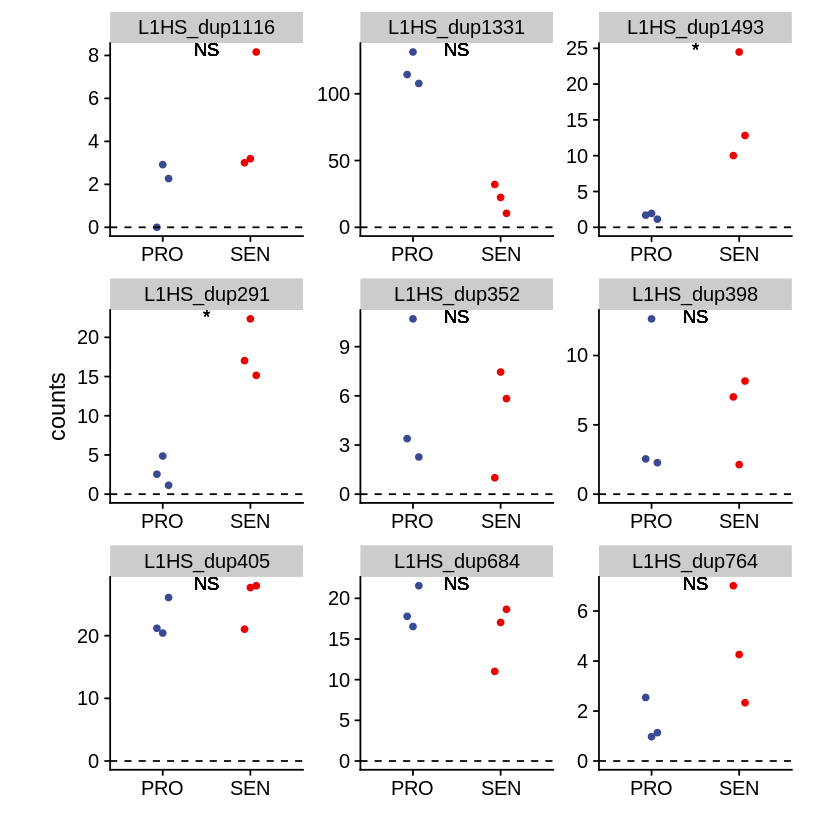

In [115]:
tidyc %>%
    filter(teorgenename %in% l1hs_sorted[1:9]) %>%
    filter(tlt == "telocal_uniq") %>%
    filter(condition %in% c("PRO", "SEN")) %>%
    ggplot(aes(x = factor(condition, levels), y = value)) +
    geom_point(aes(color = condition), position = position_dodge2(width = 0.2)) +
    facet_wrap("teorgenename", scales='free') +
    theme_cowplot() +
    theme(aspect.ratio=1) +
    scale_color_manual(values = paletteer_d("ggsci::default_aaas", 2)) +
    geom_text(aes(label = sig), x = 1.5, y = Inf, hjust = 0.5, vjust = 1) +
    theme(axis.line=element_line()) + 
    theme(legend.position = "none") +
    annotate("segment", x=-Inf, xend=Inf, y=0, yend = 0, linetype = "dashed")+
    annotate("segment", x=-Inf, xend=-Inf, y=0, yend = 0) + 
    labs(x = "", y = "counts")

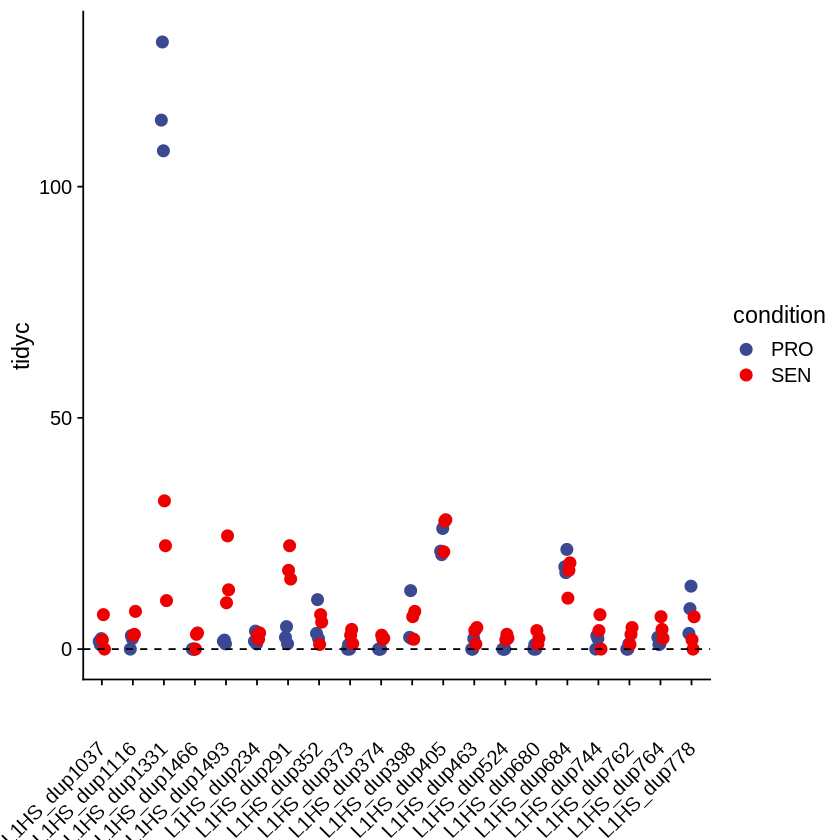

In [114]:
tidyc %>%
    filter(tlt == "telocal_uniq") %>%
    filter(teorgenename %in% l1hs_sorted[1:20]) %>%
    filter(condition %in% c("PRO", "SEN")) %>%
    ggplot(aes(x =teorgenename, y = value)) +
    geom_point(aes(color = condition), position = position_dodge2(width = 0.2), size = 3) +
    theme(axis.line=element_line()) + 
    labs(x = "", y = "tidyc") +
    theme_cowplot() +
    scale_color_manual(values = paletteer_d("ggsci::default_aaas", 2)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1)) +
    annotate("segment", x=-Inf, xend=Inf, y=0, yend = 0, linetype = "dashed")+
    annotate("segment", x=-Inf, xend=-Inf, y=0, yend = 0)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


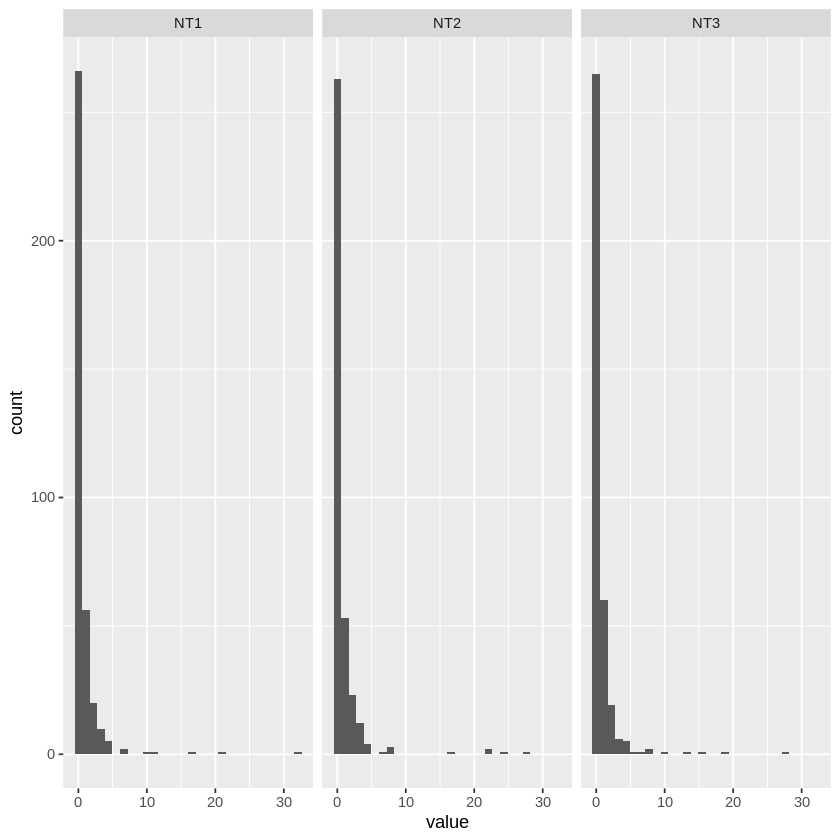

In [171]:
tidyc %>%
    dplyr::filter(tlt == "telocal_uniq") %>%
    dplyr::filter(teorgenename %in% l1hs_sorted) %>%
    dplyr::filter(condition == "SEN") %>%
ggplot() +
    geom_histogram(aes(x = value)) + 
    facet_wrap("sample")

In [169]:
head(tidyc)

teorgenename,Geneid,tlt,padj_condition_SEN_vs_PRO,region2,Family,Subfamily,sample,value,condition,sig
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,X3TC1,0,X3TC,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,X3TC2,0,X3TC,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,X3TC3,0,X3TC,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,CAS1,0,CAS,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,CAS2,0,CAS,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,CAS3,0,CAS,NA


In [174]:
md = tidyc %>%
    dplyr::filter(tlt == "telocal_uniq") %>%
    dplyr::filter(teorgenename %in% l1hs_sorted) %>%
    dplyr::filter(condition == "SEN" | condition == "PRO")

Warning message:
"Removed 42 rows containing non-finite values (`stat_ydensity()`)."
Warning message:
"Removed 42 rows containing non-finite values (`stat_summary()`)."


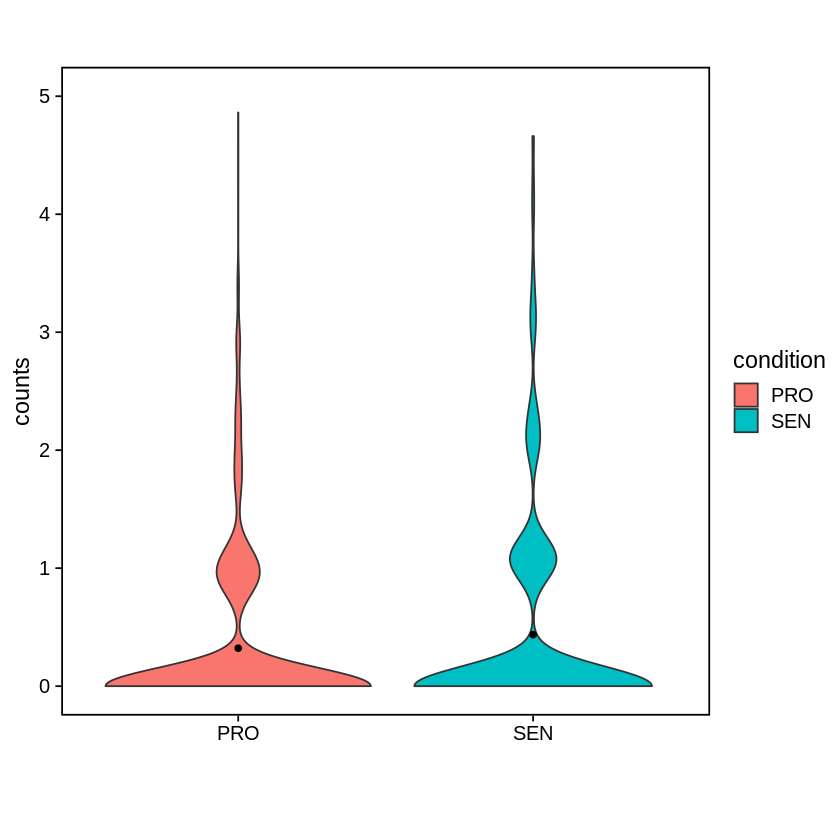

In [178]:
 md %>%
    ggplot(aes(x = condition, y = value)) +
    geom_violin(aes(fill = condition)) +
    stat_summary(fun.y = mean, geom = "point") +
    lims(y = c(0,5)) +
    theme_cowplot() +
    labs(x = "", y = "counts") + 
    theme(axis.line=element_blank(),aspect.ratio=1, panel.border = element_rect(color = "black", linetype = 1, linewidth = 1, fill = NA))

In [139]:
tidyc %>% head()


teorgenename,Geneid,tlt,padj_condition_SEN_vs_PRO,region2,Family,Subfamily,sample,value,condition,sig
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,X3TC1,0,X3TC,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,X3TC2,0,X3TC,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,X3TC3,0,X3TC,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,CAS1,0,CAS,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,CAS2,0,CAS,NA
(CATTC)n_dup1,(CATTC)n_dup1:(CATTC)n:Satellite:Satellite,telocal_multi,NA,Non-Genic,Other,Other,CAS3,0,CAS,NA


In [204]:
p = tidyc %>%
    filter(condition == "SEN") %>%
    select(-condition) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names), region2) %>%
    ggpairs(ggplot2::aes(color = region2, fill = region2)) +
    scale_color_manual(values = paletteer_d("ggsci::default_aaas", 2)) +
    scale_fill_manual(values = paletteer_d("ggsci::default_aaas", 2))+ 
    theme(plot.title = element_text(hjust = 0.5)) + ggtitle("Full Length L1HS - TElocal Unique")
ggsave("PairsPlotL1HS.pdf", p, device = "pdf", width =8,heigh= 8)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


In [205]:
p = tidyc %>%
    filter(condition == "SEN") %>%
    filter(value < 30) %>%
    select(-condition) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names), region2) %>%
    ggpairs(ggplot2::aes(color = region2, fill = region2)) +
    scale_color_manual(values = paletteer_d("ggsci::default_aaas", 2)) +
    scale_fill_manual(values = paletteer_d("ggsci::default_aaas", 2))+ 
    theme(plot.title = element_text(hjust = 0.5)) + ggtitle("Full Length L1HS - ylim curtailed - TElocal Unique")
ggsave("PairsPlotL1HSylimCurtailed.pdf", p, device = "pdf", width =8,heigh= 8)

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removing 1 row that contained a missing value"
Warning message:
"Removed 2 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 2 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
`stat_bin()` using `bins = 30`. Pick better v

In [207]:
p = tidyc %>%
    filter(condition == "SEN") %>%
    filter(value < 30) %>%
    filter(value > 0) %>%
    select(-condition) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names), region2) %>%
    ggpairs(ggplot2::aes(color = region2, fill = region2)) +
    scale_color_manual(values = paletteer_d("ggsci::default_aaas", 2)) +
    scale_fill_manual(values = paletteer_d("ggsci::default_aaas", 2))+ 
    theme(plot.title = element_text(hjust = 0.5)) + ggtitle("Full Length L1HS - ylim curtailed - Non zero counts - TElocal Unique")
ggsave("PairsPlotL1HSylimCurtailedNoZero.pdf", p, device = "pdf", width =8,heigh= 8)

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 338 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 346 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 338 rows containing missing values"
Warning message:
"Removed 212 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 212 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 338 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 214 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 214 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 346 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 338 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 215 

In [199]:
p = tidyc %>%
    filter(condition == "PRO") %>%
    filter(value < 30) %>%
    select(-condition) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names), region2) %>%
    ggpairs(ggplot2::aes(color = region2, fill = region2)) +
    scale_color_manual(values = paletteer_d("ggsci::default_aaas", 2)) +
    scale_fill_manual(values = paletteer_d("ggsci::default_aaas", 2))

In [201]:
p = p + theme(plot.title = element_text(hjust = 0.5)) + ggtitle("Full Length L1HS - TElocal Unique")
ggsave("PairsPlotL1HS.pdf", p, device = "pdf", width =8,heigh= 8)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows con

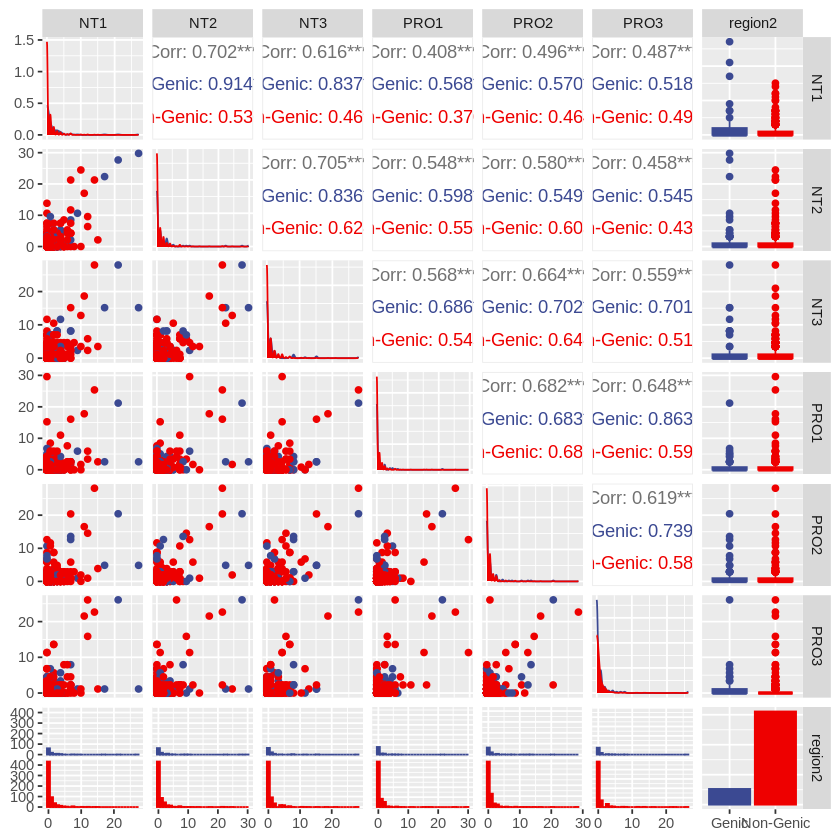

In [150]:
tidyc %>%
    filter(condition == "PRO" | condition == "SEN") %>%
    filter(value < 30) %>%
    select(-condition) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names), region2) %>%
    ggpairs(ggplot2::aes(color = region2, fill = region2)) +
    scale_color_manual(values = paletteer_d("ggsci::default_aaas", 2)) +
    scale_fill_manual(values = paletteer_d("ggsci::default_aaas", 2))

Warning message:
"Removed 3 rows containing non-finite values (`stat_density()`)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3 rows containing missing values"
Warning message:
"Removed 3 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 2 rows containing non-finite values (`stat_density()`)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2 rows containing miss

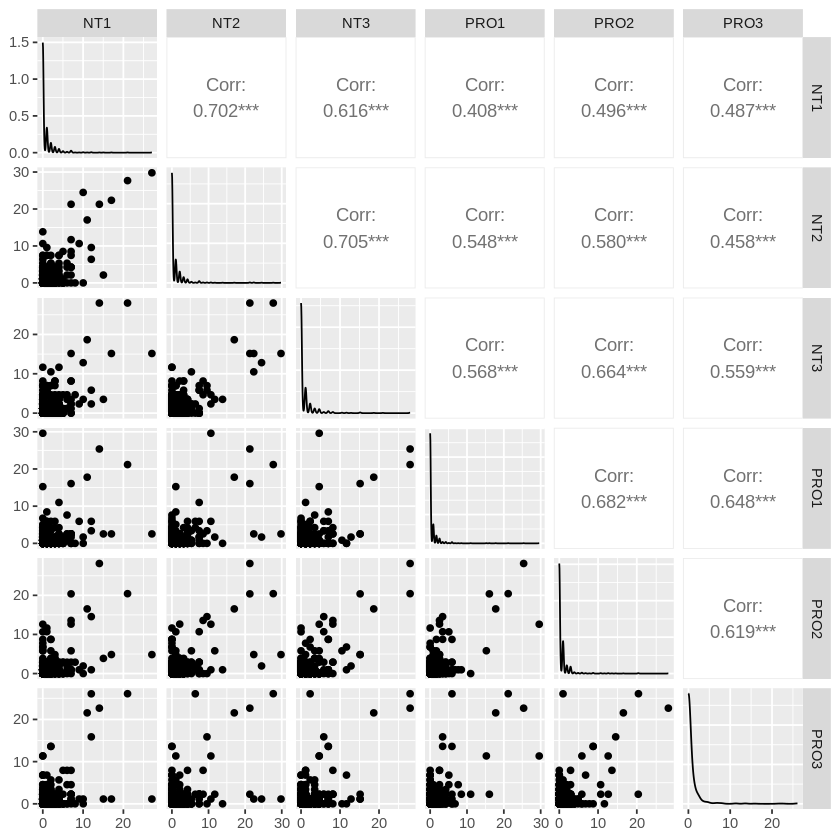

In [130]:
tidyc %>% filter(condition == "SEN" | condition == "PRO") %>%
    select(-condition) %>%
    filter(value < 30) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names)) %>%
    ggpairs()

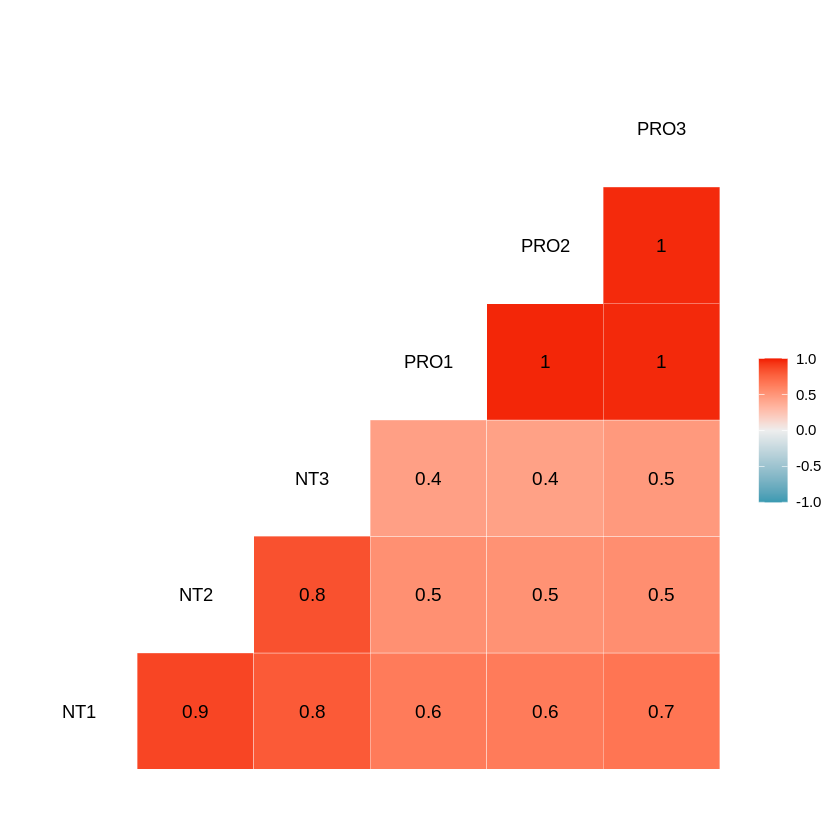

In [180]:
tidyc %>%
    filter(condition == "PRO" | condition == "SEN") %>%
    select(-condition) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names)) %>% ggcorr(label = TRUE) 

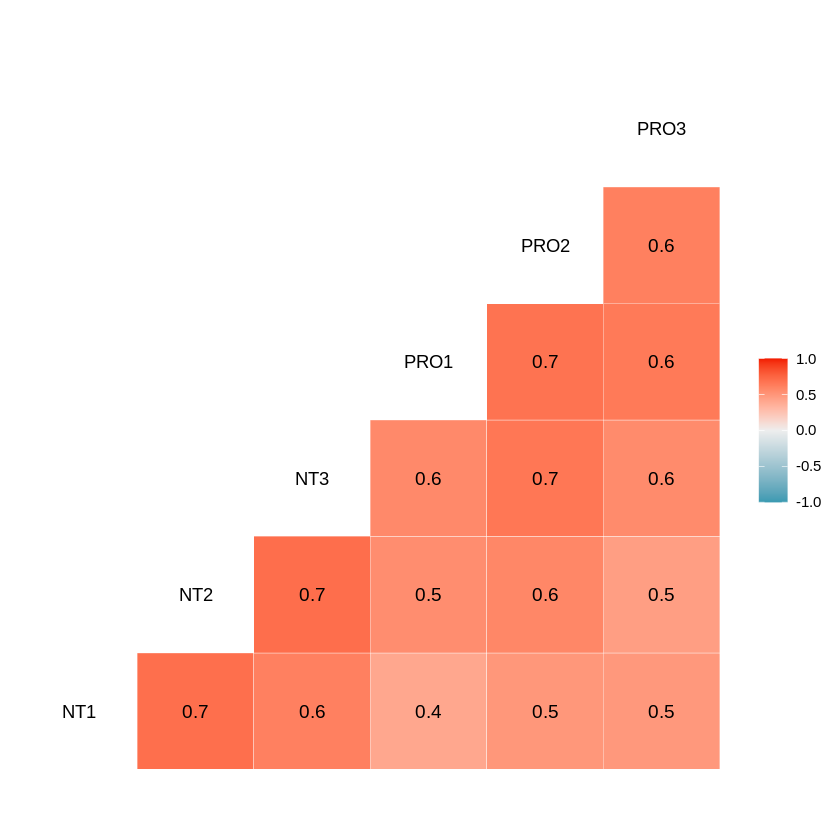

In [181]:
tidyc %>%
    filter(condition == "PRO" | condition == "SEN") %>%
    filter(value < 30) %>%
    select(-condition) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names)) %>% ggcorr(label = TRUE) 

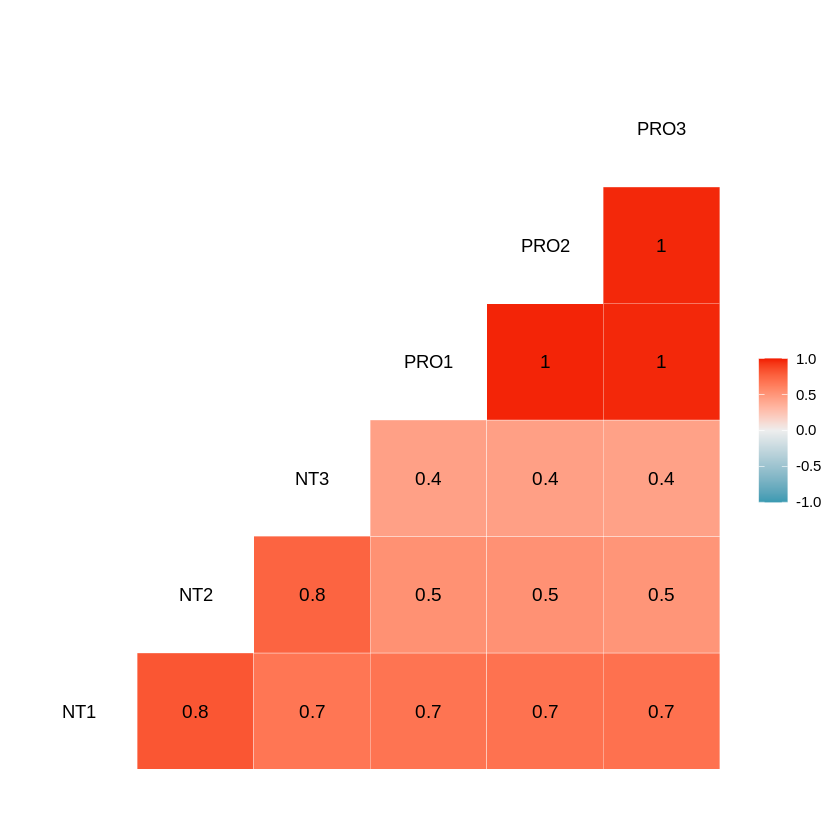

In [184]:
tidyc %>%
    filter(condition == "PRO" | condition == "SEN") %>%
    filter(region2 == "Non-Genic") %>%
    select(-condition) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names)) %>% ggcorr(label = TRUE) 

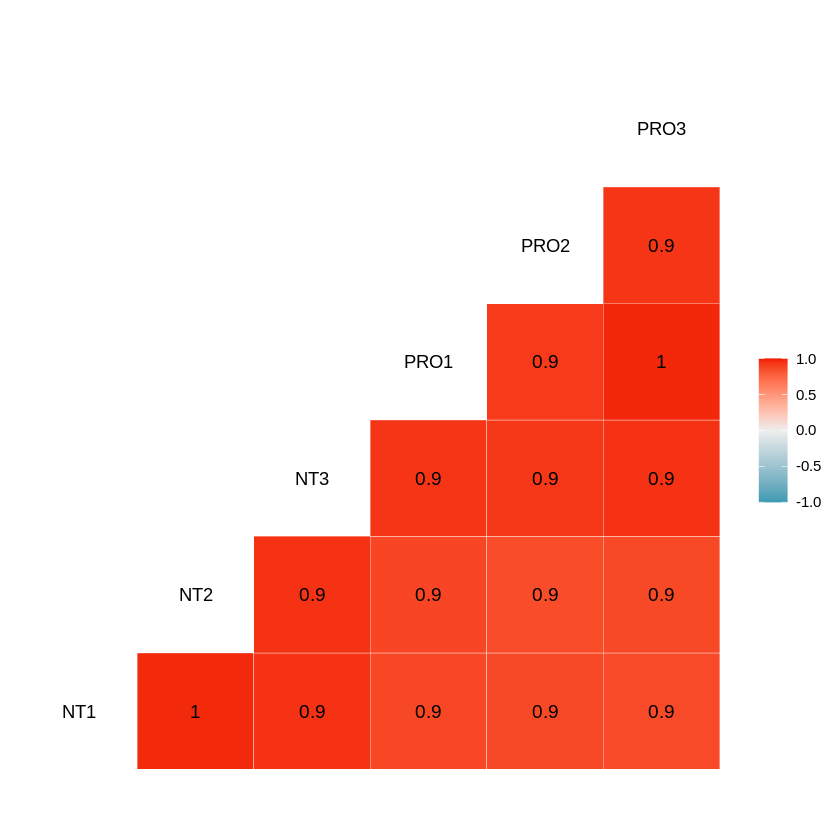

In [185]:
tidyc %>%
    filter(condition == "PRO" | condition == "SEN") %>%
    filter(region2 == "Genic") %>%
    select(-condition) %>%
    filter(teorgenename %in% l1hs_sorted) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names)) %>% ggcorr(label = TRUE) 

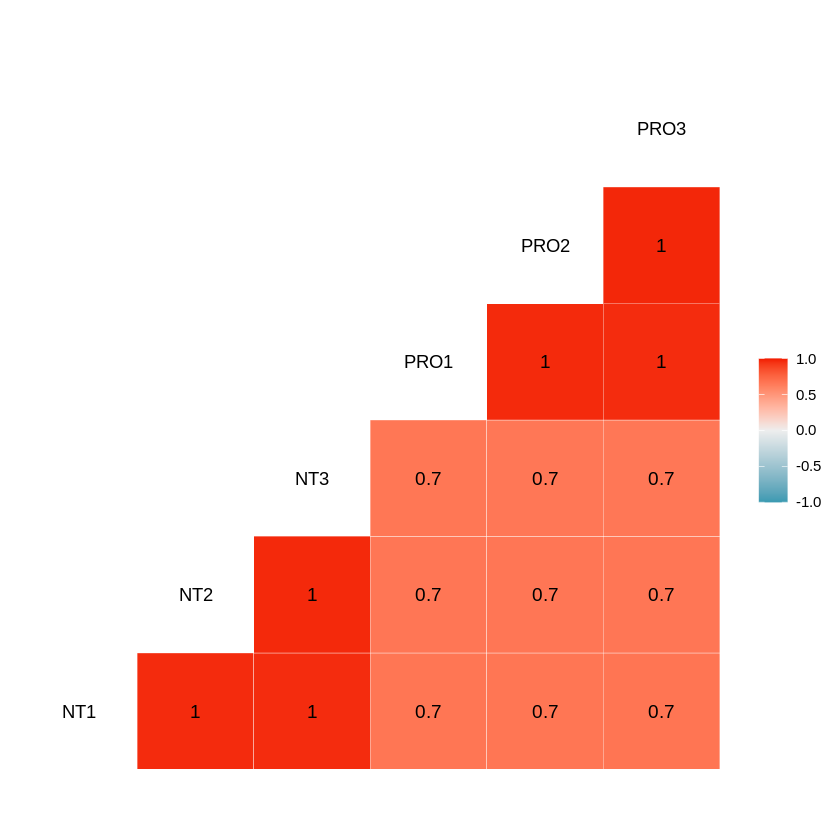

In [198]:
tidyc %>%
    slice(repeats) %>%
    filter(value > -1) %>%
    filter(condition == "PRO" | condition == "SEN") %>%
    select(-condition) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names)) %>% ggcorr(label = TRUE) 

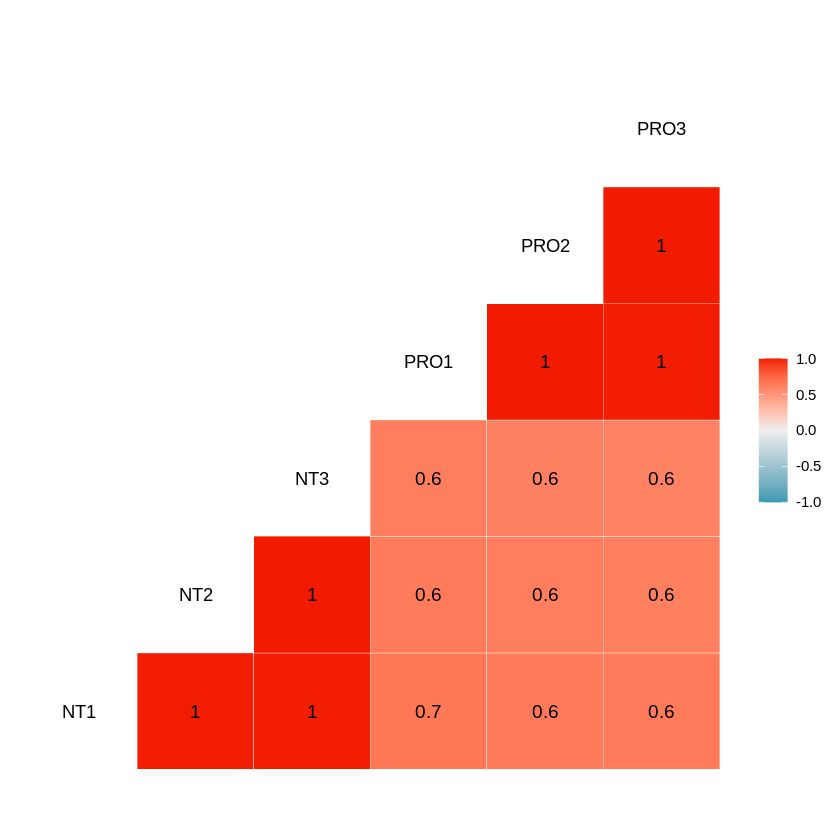

In [197]:
tidyc %>%
    slice(nonrepeats) %>%
    filter(value > -1) %>%
    filter(condition == "PRO" | condition == "SEN") %>%
    select(-condition) %>%
    pivot_wider(names_from = sample, values_from = value) %>%
    select(any_of(sample_names)) %>% ggcorr(label = TRUE) 